# Mydata classification task
## First of all let's start with simple ML

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#import missingno as msno

from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn import metrics
from sklearn.feature_selection import SelectPercentile, SelectFromModel, RFE, SequentialFeatureSelector

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, RidgeCV
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.decomposition import PCA

#from catboost import CatBoostClassifier

import sys
import warnings
warnings.filterwarnings('ignore')

In [113]:
data = pd.read_csv("Mydata.csv", names=['y','x1','x2','x3','x4','x5','x6','x7',])

In [114]:
data = data.drop(0).reset_index(drop=True)
data

,y,x1,x2,x3,x4,x5,x6,x7
0,1,19.0,5.373921,7.0,-5.000033,323.0,-0.065484,10.036647
1,1,79.0,6.195306,10.0,-5.380395,-21.0,-0.455211,9.326319
2,1,-87.0,5.864148,26.0,-5.848055,-783.0,-0.015373,10.670749
3,1,-16.0,6.873438,13.0,-4.899139,93.0,0.466524,8.688156
4,1,-80.0,7.981572,53.0,-3.794993,-273.0,1.404442,6.976342
...,...,...,...,...,...,...,...,...
995,0,35.0,8.279819,21.0,-7.867453,48.0,0.955323,11.187634
996,0,150.0,8.134403,0.0,-0.316255,-139.0,0.832575,11.846440
997,0,149.0,5.240486,3.0,-9.518826,166.0,0.193944,9.781560
998,0,-133.0,7.539876,9.0,-8.383981,92.0,-0.449630,3.935342


## <p style='color:red'>  Understanding data is key in machine learning, a lot of general knowledge is missing about data origin, utilizing expert knowledge isn't possible and that’s why modelling doesn't have its full potential.  </p>

In [115]:
data.columns

Index(['y', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7'], dtype='object')

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       1000 non-null   object 
 1   x1      1000 non-null   float64
 2   x2      1000 non-null   float64
 3   x3      1000 non-null   float64
 4   x4      1000 non-null   float64
 5   x5      1000 non-null   float64
 6   x6      1000 non-null   float64
 7   x7      1000 non-null   float64
dtypes: float64(7), object(1)
memory usage: 62.6+ KB


In [117]:
data.describe()

,x1,x2,x3,x4,x5,x6,x7
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.948000,7.101266,12.358000,-4.098961,-194.884000,-0.061125,9.145463
std,100.601501,0.914964,14.516907,3.798831,401.460522,0.984871,2.953573
min,-328.000000,2.797658,-48.000000,-15.656787,-1522.000000,-3.488934,0.662812
25%,-70.000000,6.550350,3.000000,-6.435094,-472.000000,-0.750026,7.107643
50%,1.000000,7.164256,8.000000,-4.124172,-187.500000,-0.052632,9.319496
75%,65.000000,7.787705,18.000000,-1.780641,70.250000,0.620334,11.133755
max,329.000000,9.248418,85.000000,8.917204,1245.000000,3.326096,18.670532


In [118]:
# TODO: add data type adoptation to get better storage for BIG DATA
# probably we could transform x1 and x3 to int8 or int16 to save memory and increase speed, but we have only 1000 rows

In [119]:
data.isnull().sum()

y     0
x1    0
x2    0
x3    0
x4    0
x5    0
x6    0
x7    0
dtype: int64

### change target

In [120]:
target = 'y'
X = data.drop(columns=target)
y = data[target]

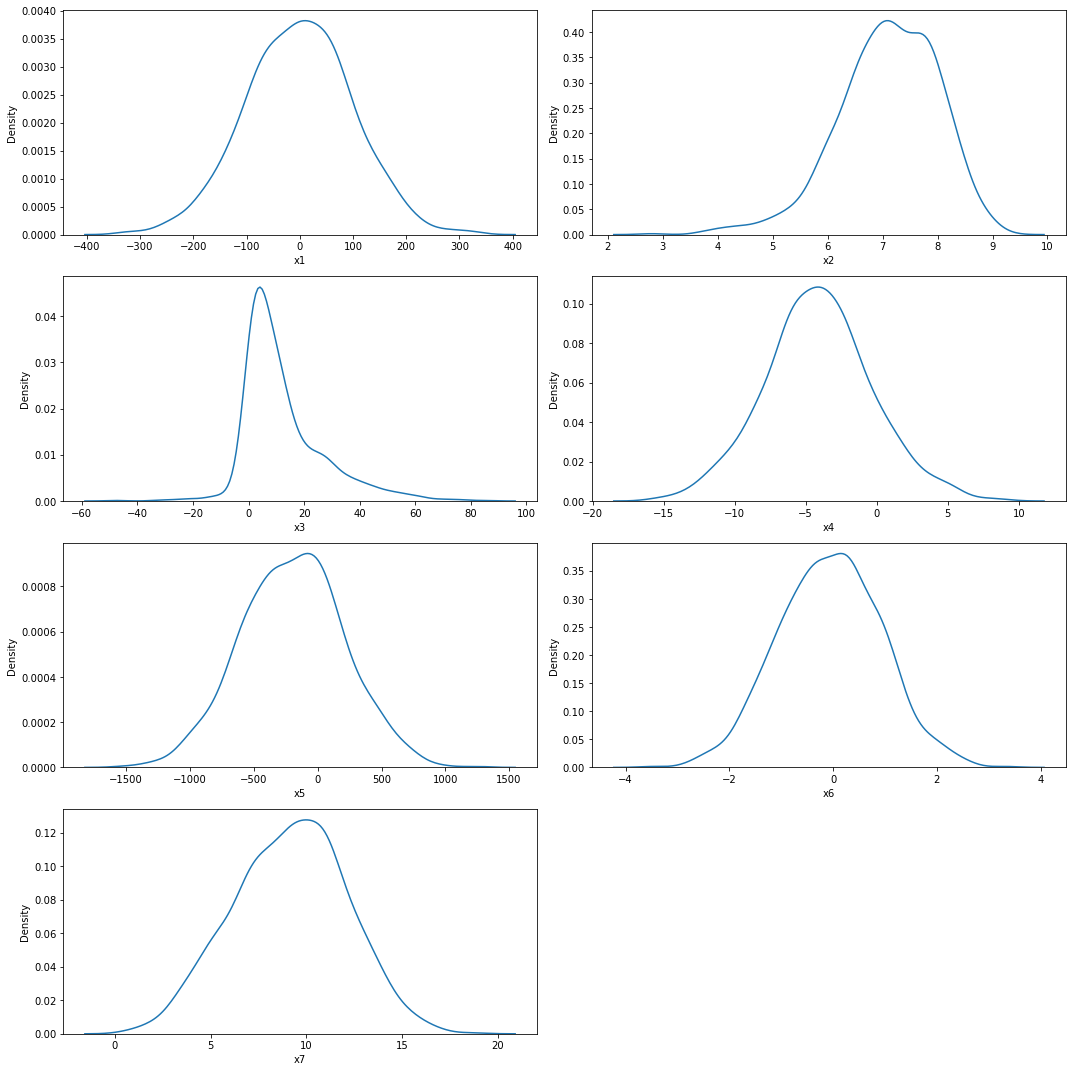

In [121]:
j=1
plt.figure(figsize = (15,15))
for i in X.columns:
    plt.subplot(int(len(X.columns)/2 + 1), 2,j)
    sns.kdeplot(X[i])
    j=j+1
plt.tight_layout()

## all features are normally distributed

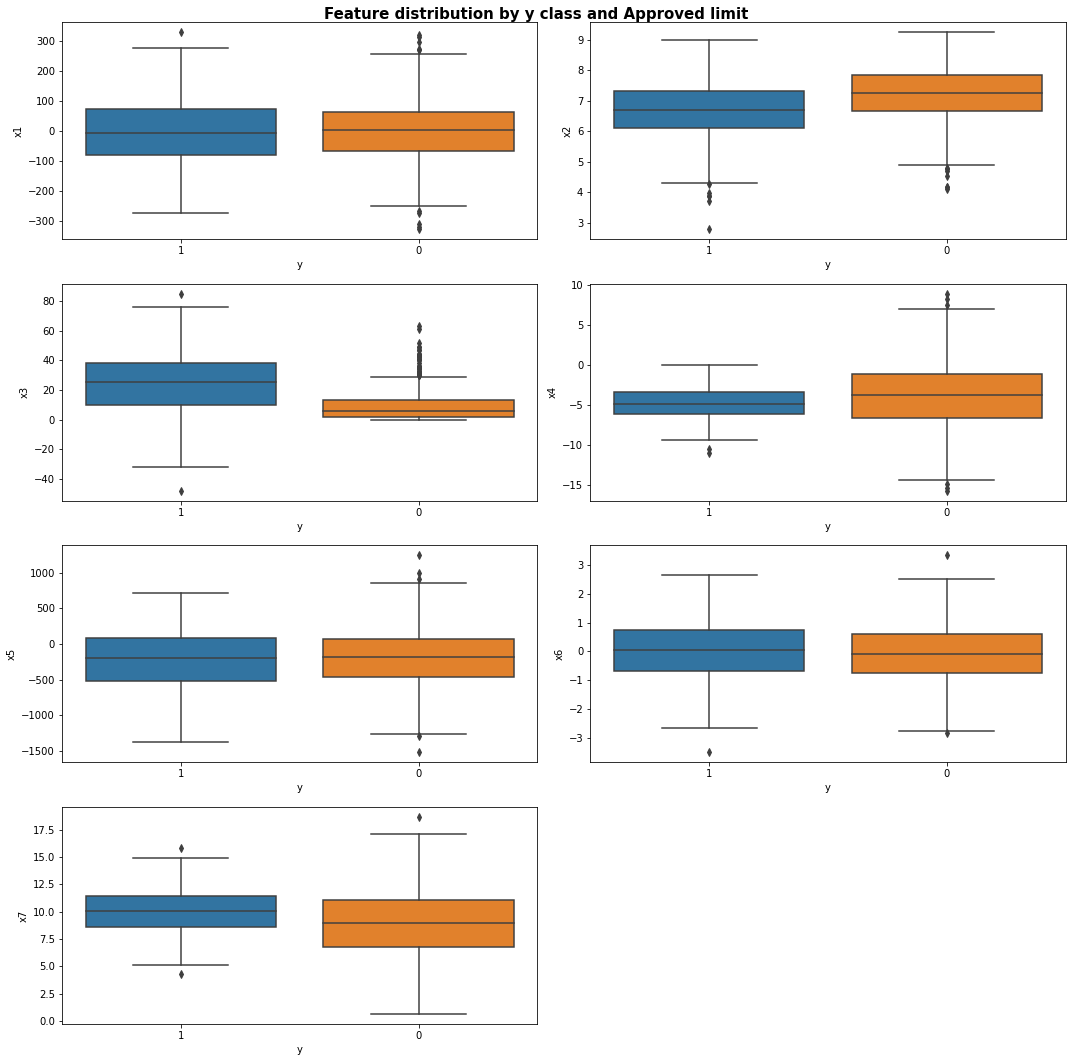

In [122]:
j=1
fig, ax= plt.subplots(nrows=3,ncols=3,figsize=(15,15), constrained_layout=True)
plt.suptitle('Feature distribution by {} class and Approved limit'.format(target), size=15, weight='bold')
for i in X.columns:
    plt.subplot(int(len(X.columns)/2 + 1), 2,j)
    sns.boxplot(data = data ,x = y,y = i)
    j=j+1
plt.tight_layout()

### Simmilar medians. Difference in amplitude at x3

<AxesSubplot:ylabel='y'>

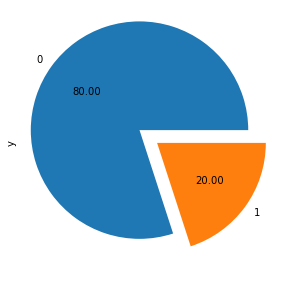

In [123]:
plt.figure(figsize = (15,5))
my_explode = [0.2,0]
my_labels = [y.unique()[1], y.unique()[0]]
y.value_counts().plot(kind = 'pie',autopct = '%.2f',explode= my_explode, labels = my_labels)

<AxesSubplot:>

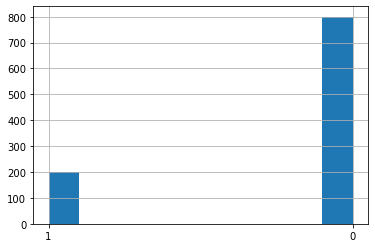

In [124]:
y.hist()

# Target class imbalance. Probably can try deleting some 0 or try adding some 1 with SMOTE algorithm

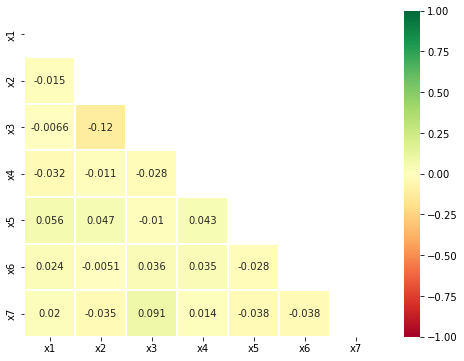

In [125]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.1, mask = mask, vmin=-1, vmax=1) 
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

### no correlations between fetures

<Figure size 960x800 with 0 Axes>

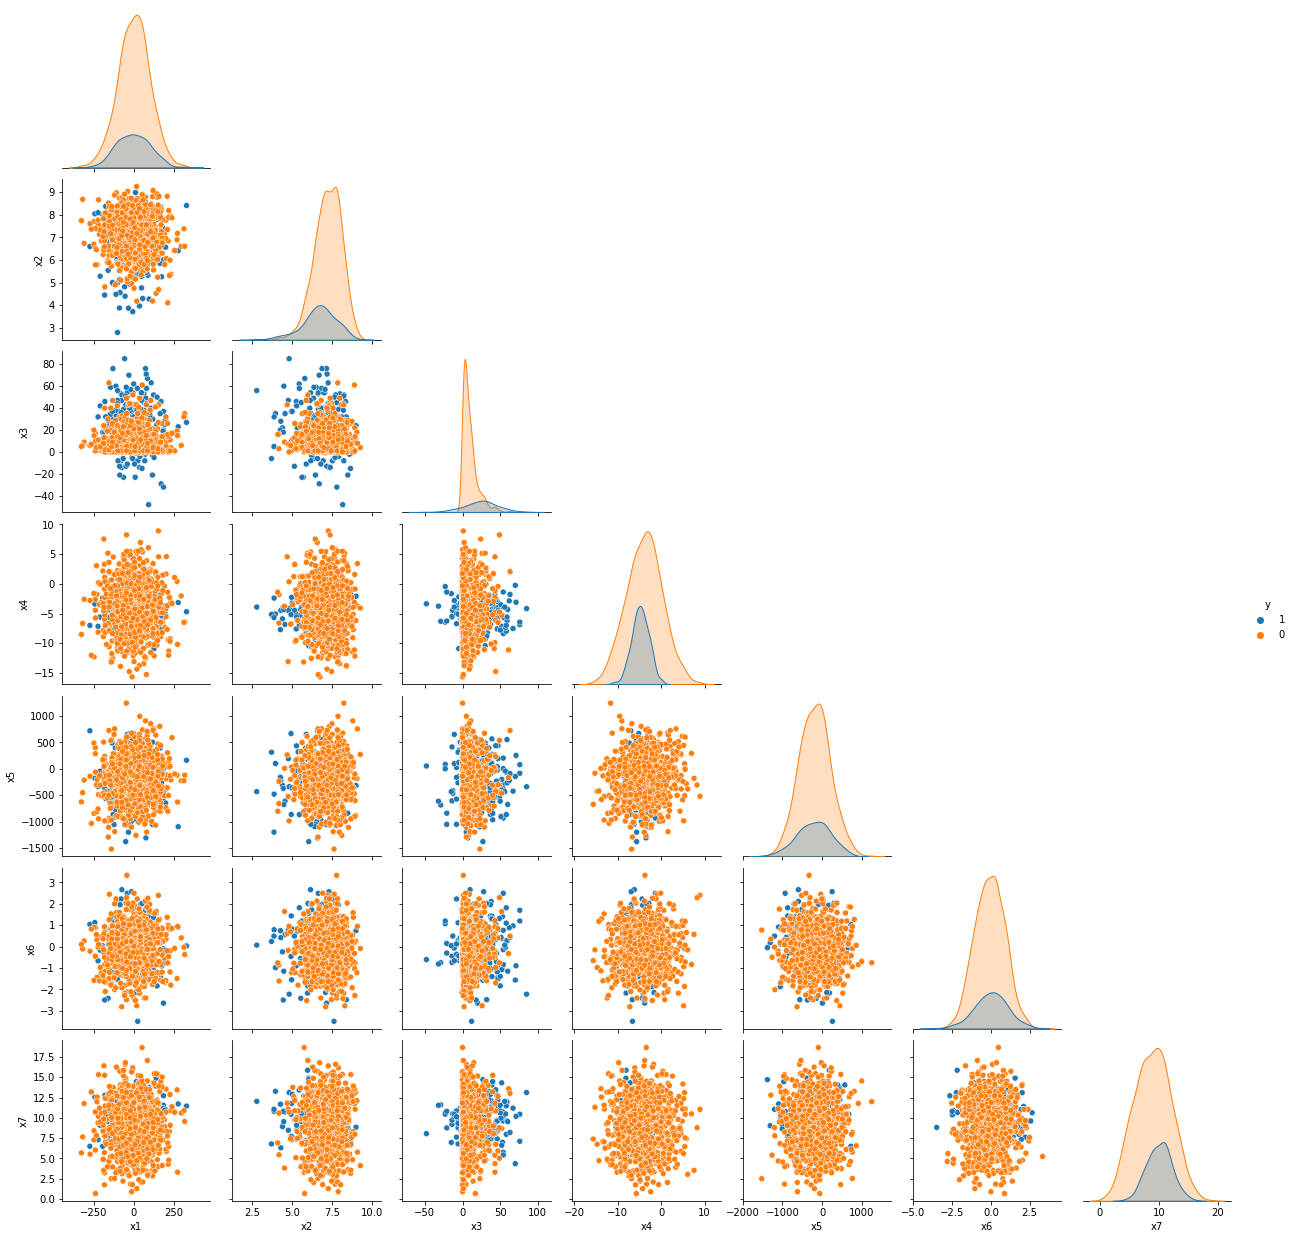

In [126]:
plt.figure(figsize=(12,10), dpi= 80)
sns.pairplot(data, hue=target, corner=True)
plt.show()

In [127]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [128]:
# leave 2 main components
pca= PCA(n_components=2)

# fitting pca on breast cancer
pca.fit(X_scaled)

# transform data to 2 main components
X_pca = pca.transform(X_scaled)
print("starting array shape: {}".format(str(X_scaled.shape)))
print("shape after transformation: {}".format(str(X_pca.shape)))

starting array shape: (1000, 7)
shape after transformation: (1000, 2)


In [129]:
import plotly.express as px

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter(X_pca, x=0, y=1, color=data[target], title=f'Total Explained Variance: {total_var:.2f}%',)
fig.show()

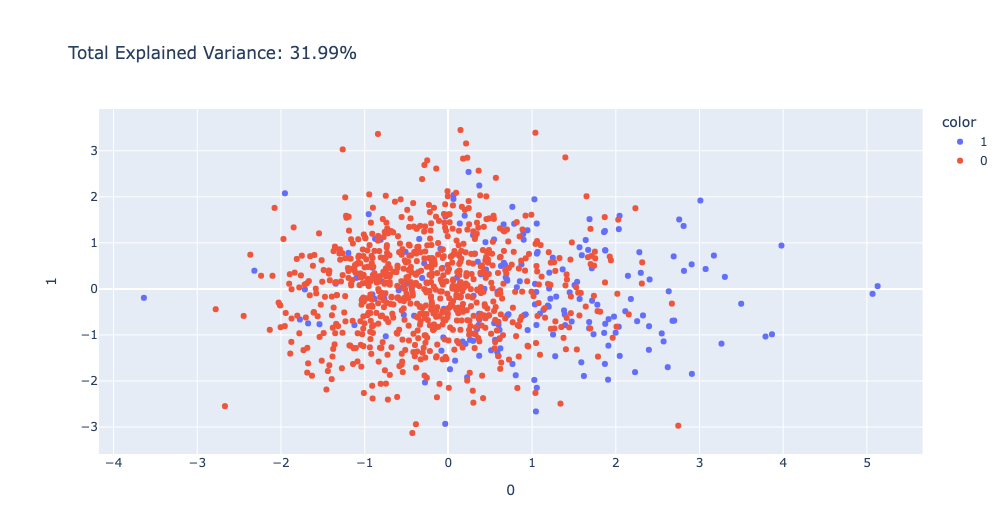

Text(0, 0.5, 'main components')

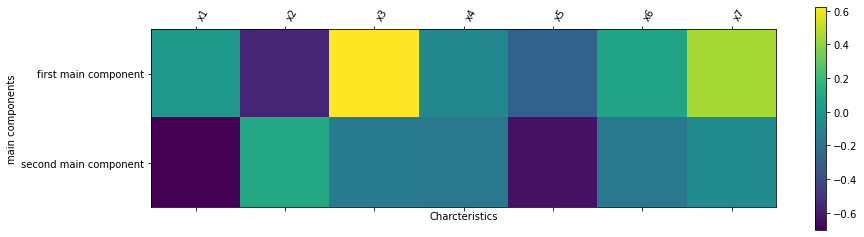

In [130]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["first main component", "second main component"])
plt.colorbar()
plt.xticks(range(len(X.columns)),
           X.columns, rotation=60, ha='left')
plt.xlabel("Charcteristics")
plt.ylabel("main components")

In [131]:
pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=data[target],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

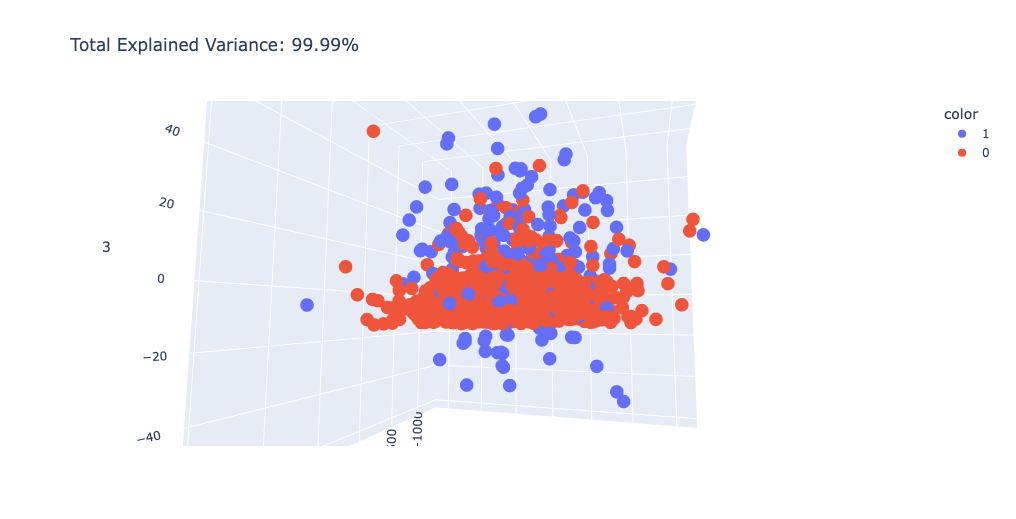

Text(0, 0.5, 'main components')

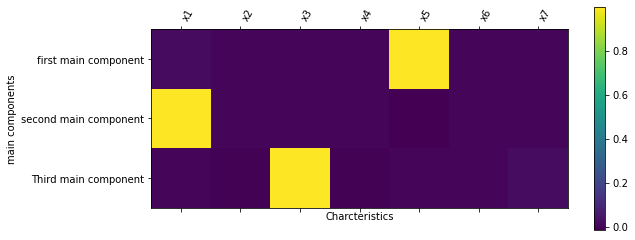

In [132]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1, 2], ["first main component", "second main component", "Third main component"])
plt.colorbar()
plt.xticks(range(len(X.columns)),
           X.columns, rotation=60, ha='left')
plt.xlabel("Charcteristics")
plt.ylabel("main components")

# TRAIN 


In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2, stratify=y)

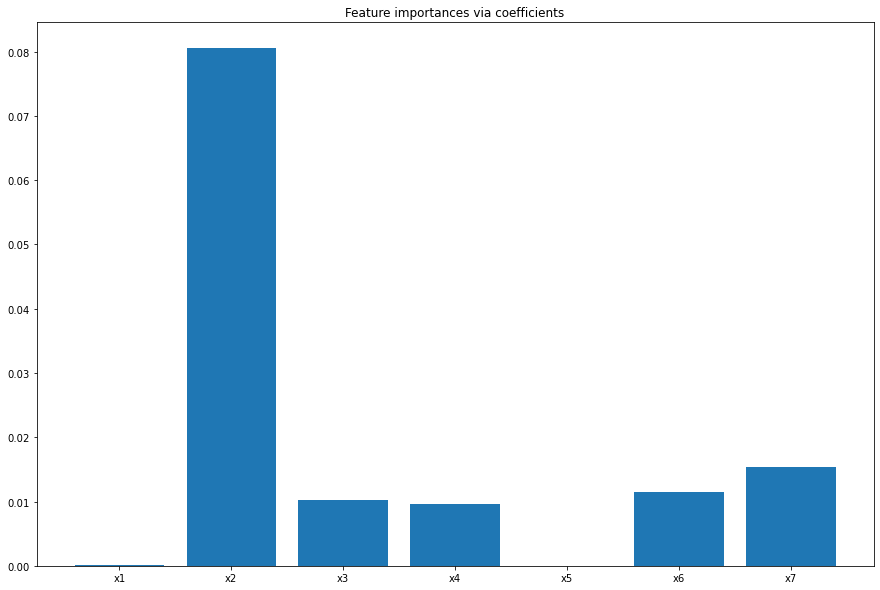

In [134]:
ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X, y)
importance = np.abs(ridge.coef_)
feature_names = np.array(X.columns)
plt.rcParams["figure.figsize"] = (15,10)
plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients")
plt.show()

### Why not try feature selection, maybe dropping some of them can improve the results

Features selected by SelectFromModel(estimator=RidgeCV(alphas=array([1.e-06, 1.e-03, 1.e+00, 1.e+03, 1.e+06])),
                threshold='median'):

  ['x2' 'x3' 'x4' 'x7'] 


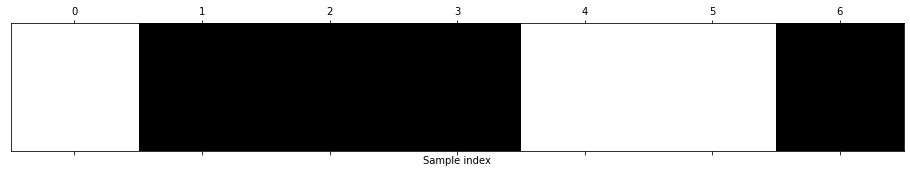

--------------------------------------------------------------------------------------------------------------------

Features selected by SequentialFeatureSelector(estimator=RidgeCV(alphas=array([1.e-06, 1.e-03, 1.e+00, 1.e+03, 1.e+06])),
                          n_features_to_select=3):

  ['x2' 'x3' 'x4'] 


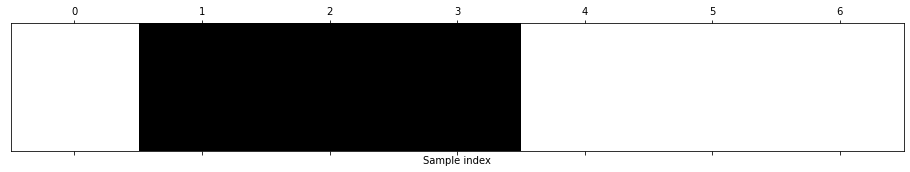

--------------------------------------------------------------------------------------------------------------------

Features selected by SequentialFeatureSelector(estimator=RandomForestClassifier(random_state=42),
                          n_features_to_select=3):

  ['x2' 'x3' 'x4'] 


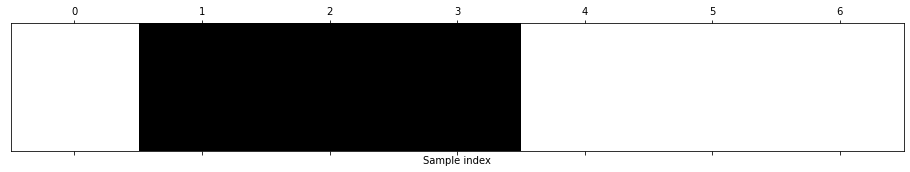

--------------------------------------------------------------------------------------------------------------------

Features selected by SelectPercentile(percentile=50):

  ['x2' 'x3' 'x7'] 


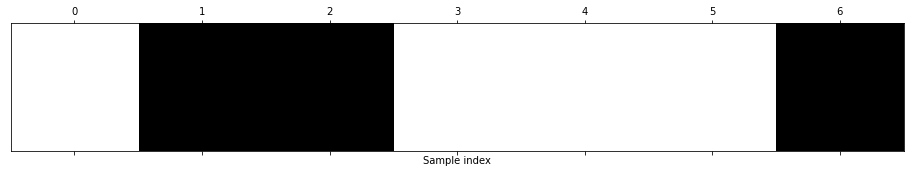

--------------------------------------------------------------------------------------------------------------------

Features selected by RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=3):

  ['x2' 'x3' 'x4'] 


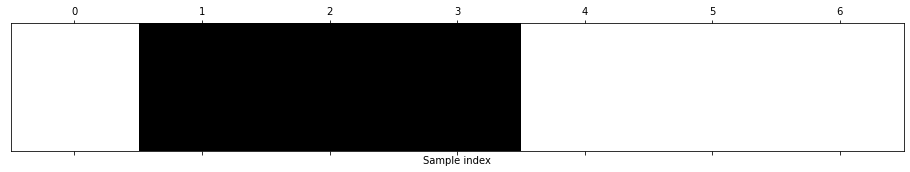

--------------------------------------------------------------------------------------------------------------------

Features selected by SelectFromModel(estimator=RandomForestClassifier(random_state=42),
                threshold='median'):

  ['x2' 'x3' 'x4' 'x7'] 


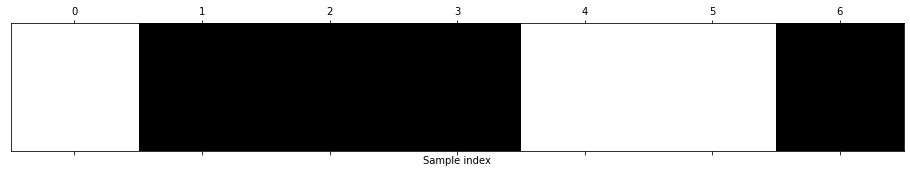

--------------------------------------------------------------------------------------------------------------------



In [135]:
#feature selection

feature_selection = True   # CHANGE IF NEEDED

n=3  #feature count          CHANGE IF NEEDED
threshold = "median"       # CHANGE IF NEEDED
percentile = 50  # %         CHANGE IF NEEDED


if feature_selection:
    select_list=[]
    X_select_list_train = []
    X_select_list_test = []

    sfm_ridge = SelectFromModel(ridge, threshold=threshold).fit(X_train, y_train)
    sfs_ridge = SequentialFeatureSelector(ridge, n_features_to_select=n, direction="forward").fit(X_train, y_train)
    sfs_rf = SequentialFeatureSelector(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=n,
                                       direction="forward").fit(X_train, y_train)
    
    sp = SelectPercentile(percentile=percentile).fit(X_train, y_train)
    rfe = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=n).fit(X_train, y_train)
    sfm_rf = SelectFromModel(RandomForestClassifier(n_estimators=100,random_state=42),threshold=threshold).fit(X_train,y_train)

    select_list.append(sfm_ridge)
    select_list.append(sfs_ridge)
    select_list.append(sfs_rf)
    
    select_list.append(sp)
    select_list.append(rfe)
    select_list.append(sfm_rf)
    
    for i in select_list:
        mask = i.get_support()
        
        print("Features selected by {1}:\n\n \033[1m {0} \033[0m".format(feature_names[mask], i))

        # create train and test list to check which feature selector is working better
        X_select_list_train.append(i.transform(X_train))
        X_select_list_test.append(i.transform(X_test))

        # visualize the mask. black is True, white is False
        plt.matshow(mask.reshape(1, -1), cmap='gray_r')
        plt.xlabel("Sample index")
        plt.yticks(())
        plt.show()
        print("{}\n".format('-' * 116))

# We have small data set so continue with next steps 

In [136]:
"""pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC())])"""

"pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC())])"

In [137]:
"""#large data || if modeling time is relatively long

param_grid = [
    
    {'classifier': [SVC()],
     'preprocessing': [StandardScaler(), None],
     'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
     'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
    },
    
    {'classifier': [RandomForestClassifier(n_estimators=100)],
     'preprocessing': [None],
     'classifier__max_features': [1, 2, 3]
    },
    
    {'classifier': [LogisticRegression(max_iter=1000)],
     'preprocessing': [StandardScaler(), None],
     'classifier__C': [0.01, 0.1, 1, 10, 100]   
    },
    
    {'classifier': [KNeighborsClassifier()],
     'preprocessing': [StandardScaler(), None],
    'classifier__n_neighbors': [1,2,5,10]
    },
    
    {'classifier': [DecisionTreeClassifier()],
     'preprocessing': [None],
     'classifier__max_features': [1, 2, 3]
    },
    
    {'classifier': [MultinomialNB()],
     'preprocessing': [StandardScaler(), None],
     'classifier__alpha': [0.01, 0.1, 0.5, 1]   
    }
]"""

"#large data || if modeling time is relatively long\n\nparam_grid = [\n    \n    {'classifier': [SVC()],\n     'preprocessing': [StandardScaler(), None],\n     'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],\n     'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]\n    },\n    \n    {'classifier': [RandomForestClassifier(n_estimators=100)],\n     'preprocessing': [None],\n     'classifier__max_features': [1, 2, 3]\n    },\n    \n    {'classifier': [LogisticRegression(max_iter=1000)],\n     'preprocessing': [StandardScaler(), None],\n     'classifier__C': [0.01, 0.1, 1, 10, 100]   \n    },\n    \n    {'classifier': [KNeighborsClassifier()],\n     'preprocessing': [StandardScaler(), None],\n    'classifier__n_neighbors': [1,2,5,10]\n    },\n    \n    {'classifier': [DecisionTreeClassifier()],\n     'preprocessing': [None],\n     'classifier__max_features': [1, 2, 3]\n    },\n    \n    {'classifier': [MultinomialNB()],\n     'preprocessing': [StandardScaler(), None],\n     'classifier__

In [138]:
"""if feature_selection:
    for X_selected, name in enumerate(select_list):
        mask = name.get_support()
        print("Features selected by {1}:\n\n \033[1m {0} \033[0m".format(feature_names[mask], name))
        
        grid = GridSearchCV(pipe, param_grid, cv=3, scoring="roc_auc") # cv - cross-validation
        grid.fit(X_select_list_train[X_selected], y_train)
        print("Best params:\n{}\n".format(grid.best_params_))
        print("Best cross-validation score: {:.2f}".format(grid.best_score_))
        print("Test-set score: {:.2f}".format(grid.score(X_select_list_test[X_selected], y_test)))
        
        print("{}".format('-' * 100))


print("\nALL FEATURES\n")
grid = GridSearchCV(pipe, param_grid, cv=3, scoring="roc_auc") # cv - cross-validation
grid.fit(X_train, y_train)

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))"""

'if feature_selection:\n    for X_selected, name in enumerate(select_list):\n        mask = name.get_support()\n        print("Features selected by {1}:\n\n \x1b {0} \x1b".format(feature_names[mask], name))\n        \n        grid = GridSearchCV(pipe, param_grid, cv=3, scoring="roc_auc") # cv - cross-validation\n        grid.fit(X_select_list_train[X_selected], y_train)\n        print("Best params:\n{}\n".format(grid.best_params_))\n        print("Best cross-validation score: {:.2f}".format(grid.best_score_))\n        print("Test-set score: {:.2f}".format(grid.score(X_select_list_test[X_selected], y_test)))\n        \n        print("{}".format(\'-\' * 100))\n\n\nprint("\nALL FEATURES\n")\ngrid = GridSearchCV(pipe, param_grid, cv=3, scoring="roc_auc") # cv - cross-validation\ngrid.fit(X_train, y_train)\n\nprint("Best params:\n{}\n".format(grid.best_params_))\nprint("Best cross-validation score: {:.2f}".format(grid.best_score_))\nprint("Test-set score: {:.2f}".format(grid.score(X_test, y

In [139]:
# small data || if modeling time is relatively short  

pipe = Pipeline([('preprocessing', StandardScaler()), ('poly', PolynomialFeatures()),
                 ('pca', PCA()), ('classifier', SVC())])

param_grid = [
    
    {'classifier': [SVC()],
     'preprocessing': [StandardScaler(), None],
     'poly': [PolynomialFeatures(degree=2), None],
     'pca': [PCA(n_components=2), PCA(n_components=3), None],
     'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
     'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
    },
    
    {'classifier': [RandomForestClassifier(n_estimators=100)],
     'preprocessing': [None],
     'poly': [PolynomialFeatures(degree=2), None],
     'pca': [PCA(n_components=2), PCA(n_components=3), None],
     'classifier__max_features': [1, 2, 3]
    },
    
    {'classifier': [LogisticRegression(max_iter=1000)],
     'preprocessing': [StandardScaler(), None],
     'poly': [PolynomialFeatures(degree=2), None],
     'pca': [PCA(n_components=2), PCA(n_components=3), None],
     'classifier__C': [0.01, 0.1, 1, 10, 100]   
    },
    
    {'classifier': [KNeighborsClassifier()],
     'preprocessing': [StandardScaler(), None],
     'poly': [PolynomialFeatures(degree=2), None],
     'pca': [PCA(n_components=2), PCA(n_components=3), None],
    'classifier__n_neighbors': [1,2,5,10]
    },
    
    {'classifier': [DecisionTreeClassifier()],
     'preprocessing': [None],
     'poly': [PolynomialFeatures(degree=2), None],
     'pca': [PCA(n_components=2), PCA(n_components=3), None],
     'classifier__max_features': [1, 2, 3]
    },
    
    {'classifier': [MultinomialNB()],
     'preprocessing': [StandardScaler(), None],
     'poly': [PolynomialFeatures(degree=2), None],
     'pca': [PCA(n_components=2), PCA(n_components=3), None],
     'classifier__alpha': [0.01, 0.1, 0.5, 1]   
    }
]

In [140]:
def no_dublicates(list_, obj):
    for i in list_:
        if np.array_equal(i, obj):
            return False
    return True

In [141]:
if feature_selection:
    mask_list=[]
    for X_selected, name in enumerate(select_list):
        mask = name.get_support()
        if no_dublicates(mask_list,mask):
            print("Features selected by {1}:\n\n \033[1m {0} \033[0m \n".format(feature_names[mask], name))

            grid = GridSearchCV(pipe, param_grid, cv=3, scoring="roc_auc") # cv - cross-validation
            grid.fit(X_select_list_train[X_selected], y_train)
            print("Best params:\n{}\n".format(grid.best_params_))
            print("Best cross-validation score: {:.2f}".format(grid.best_score_))
            print("Test-set score: {:.2f}".format(grid.score(X_select_list_test[X_selected], y_test)))

            print("{}\n".format('-' * 116))
        mask_list.append(mask.tolist())

print("\n\033[1m ALL FEATURES \033[0m\n")
grid = GridSearchCV(pipe, param_grid, cv=5, scoring="roc_auc") # cv - cross-validation
grid.fit(X_train, y_train)

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Features selected by SelectFromModel(estimator=RidgeCV(alphas=array([1.e-06, 1.e-03, 1.e+00, 1.e+03, 1.e+06])),
                threshold='median'):

  ['x2' 'x3' 'x4' 'x7']  

Best params:
{'classifier': RandomForestClassifier(max_features=3), 'classifier__max_features': 3, 'pca': None, 'poly': PolynomialFeatures(), 'preprocessing': None}

Best cross-validation score: 0.92
Test-set score: 0.95
--------------------------------------------------------------------------------------------------------------------

Features selected by SequentialFeatureSelector(estimator=RidgeCV(alphas=array([1.e-06, 1.e-03, 1.e+00, 1.e+03, 1.e+06])),
                          n_features_to_select=3):

  ['x2' 'x3' 'x4']  

Best params:
{'classifier': SVC(C=100, gamma=0.001), 'classifier__C': 100, 'classifier__gamma': 0.001, 'pca': PCA(n_components=3), 'poly': None, 'preprocessing': None}

Best cross-validation score: 0.90
Test-set score: 0.93
----------------------------------------------------------------

# <p style='color:Blue'> Got best results of 0.95 on test data and 0.92 cross-validation, but our baseline is 80% so model has 15% improvement on baseline  </p>

### Based on current observations i would recommend choosing:

['x2' 'x3' 'x4' 'x7']  as  features

Best params:
'classifier': RandomForestClassifier(max_features=3)
'poly': PolynomialFeatures()

Best cross-validation score: 0.92
Test-set score: 0.95

In [142]:
X_new = X.drop(['x1','x5','x6'],axis=1)
X_new

,x2,x3,x4,x7
0,5.373921,7.0,-5.000033,10.036647
1,6.195306,10.0,-5.380395,9.326319
2,5.864148,26.0,-5.848055,10.670749
3,6.873438,13.0,-4.899139,8.688156
4,7.981572,53.0,-3.794993,6.976342
...,...,...,...,...
995,8.279819,21.0,-7.867453,11.187634
996,8.134403,0.0,-0.316255,11.846440
997,5.240486,3.0,-9.518826,9.781560
998,7.539876,9.0,-8.383981,3.935342


In [143]:
poly = PolynomialFeatures(degree=2)
poly.fit(X_new)
X_poly = poly.transform(X_new)

In [144]:
X_train_last, X_test_last, y_train_last, y_test_last = train_test_split(X_poly,
                                                                        y, random_state=0,
                                                                        test_size=0.2,
                                                                        stratify=y)

In [156]:
rf = RandomForestClassifier(max_features=3)
rf.fit(X_train_last, y_train_last)

RandomForestClassifier(max_features=3)

In [157]:
pred_rf = rf.predict(X_test_last)

In [158]:
from sklearn.metrics import classification_report
print("Classification Report: \n", classification_report(y_test_last, pred_rf))

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       160
           1       0.85      0.70      0.77        40

    accuracy                           0.92       200
   macro avg       0.89      0.83      0.86       200
weighted avg       0.91      0.92      0.91       200



In [159]:
roc_auc_score(y_test_last, pred_rf)

0.834375

### Let's try catboost, usually when random forest is the best classifier, catboost can show better results

In [160]:
from catboost import CatBoostClassifier

In [161]:
clf = CatBoostClassifier()

In [162]:
clf.fit(X_train_last, y_train_last,
        eval_set=(X_test_last, y_test_last))

Learning rate set to 0.02999
0:	learn: 0.6593927	test: 0.6571340	best: 0.6571340 (0)	total: 3.37ms	remaining: 3.37s
1:	learn: 0.6291460	test: 0.6244084	best: 0.6244084 (1)	total: 5.1ms	remaining: 2.54s
2:	learn: 0.6055380	test: 0.5996080	best: 0.5996080 (2)	total: 7.27ms	remaining: 2.41s
3:	learn: 0.5855378	test: 0.5797902	best: 0.5797902 (3)	total: 9.18ms	remaining: 2.28s
4:	learn: 0.5600421	test: 0.5514844	best: 0.5514844 (4)	total: 11ms	remaining: 2.18s
5:	learn: 0.5424364	test: 0.5339996	best: 0.5339996 (5)	total: 12.6ms	remaining: 2.09s
6:	learn: 0.5283931	test: 0.5197419	best: 0.5197419 (6)	total: 14.4ms	remaining: 2.04s
7:	learn: 0.5083135	test: 0.4996984	best: 0.4996984 (7)	total: 16ms	remaining: 1.99s
8:	learn: 0.4884444	test: 0.4788225	best: 0.4788225 (8)	total: 17.9ms	remaining: 1.97s
9:	learn: 0.4748465	test: 0.4638398	best: 0.4638398 (9)	total: 19.5ms	remaining: 1.93s
10:	learn: 0.4607823	test: 0.4486421	best: 0.4486421 (10)	total: 21.4ms	remaining: 1.92s
11:	learn: 0.4436

In [163]:
pred_cat = clf.predict(X_test_last)

In [164]:
clf.score(X_test_last, y_test_last) # accuracy

0.93

In [165]:
print("Classification Report: \n", classification_report(y_test_last, pred_cat))

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       160
           1       0.88      0.75      0.81        40

    accuracy                           0.93       200
   macro avg       0.91      0.86      0.88       200
weighted avg       0.93      0.93      0.93       200



In [166]:
roc_auc_score(y_test_last, pred_cat)

0.8625

# <p style='color:Green'> CatBoost Classifier is the best algorithm for this problem, random forest and catboost classifiers don’t need data normalization. Model accuracy on test sample isn't the best metric, especially in target class imbalance problem.</p>

## PS. Next steps in model improvement would be:

### 1) Try XGBOOST
### 2) Try tensorflows' Neural Network 
#### my tensorflow works: (https://github.com/MMatulenko/mm_data_science/tree/main/Colab/tensorflow)